# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [37]:
# Dependencies and Setup
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches                                        
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [12]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

611


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [13]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# # set up lists to hold reponse info
search_data = []
cityList = []
countryList = []

searchCnt = 0
print("Begin API Call to OpenWeather Database ")
print("---------------------------------------")
for city in cities:
    searchCnt += 1
    print(f"Processing record {searchCnt} for the city: {city}")   
    response = requests.get(query_url + city).json()
    searchCityID = response.get("id")
    if response.get("id"):
        print(f"     Record found for city: {city}    city id: {searchCityID}")
        search_data.append(response)
        cityList.append(city)
    else:
        print(f"     No weather record found for city: {city}")


Begin API Call to OpenWeather Database 
---------------------------------------
Processing record 1 for the city: castro
     Record found for city: castro    city id: 3896218
Processing record 2 for the city: margate
     Record found for city: margate    city id: 2158744
Processing record 3 for the city: normandin
     Record found for city: normandin    city id: 6089179
Processing record 4 for the city: sitka
     Record found for city: sitka    city id: 4267710
Processing record 5 for the city: puerto ayora
     Record found for city: puerto ayora    city id: 3652764
Processing record 6 for the city: qaanaaq
     Record found for city: qaanaaq    city id: 3831208
Processing record 7 for the city: bethel
     Record found for city: bethel    city id: 5880568
Processing record 8 for the city: albany
     Record found for city: albany    city id: 5106834
Processing record 9 for the city: ushuaia
     Record found for city: ushuaia    city id: 3833367
Processing record 10 for the city:

     Record found for city: rio branco    city id: 3662574
Processing record 83 for the city: provideniya
     Record found for city: provideniya    city id: 4031574
Processing record 84 for the city: busselton
     Record found for city: busselton    city id: 2075265
Processing record 85 for the city: georgetown
     Record found for city: georgetown    city id: 3378644
Processing record 86 for the city: nizhneyansk
     No weather record found for city: nizhneyansk
Processing record 87 for the city: loralai
     Record found for city: loralai    city id: 1171868
Processing record 88 for the city: neryungri
     Record found for city: neryungri    city id: 2019309
Processing record 89 for the city: euclides da cunha
     Record found for city: euclides da cunha    city id: 3463698
Processing record 90 for the city: ulaangom
     Record found for city: ulaangom    city id: 1515029
Processing record 91 for the city: leninskoye
     Record found for city: leninskoye    city id: 1510350
P

     Record found for city: souillac    city id: 3026644
Processing record 164 for the city: port hedland
     Record found for city: port hedland    city id: 2063042
Processing record 165 for the city: idlib
     Record found for city: idlib    city id: 169389
Processing record 166 for the city: leningradskiy
     Record found for city: leningradskiy    city id: 2123814
Processing record 167 for the city: richards bay
     Record found for city: richards bay    city id: 962367
Processing record 168 for the city: normal
     Record found for city: normal    city id: 4903780
Processing record 169 for the city: inuvik
     Record found for city: inuvik    city id: 5983607
Processing record 170 for the city: tuktoyaktuk
     Record found for city: tuktoyaktuk    city id: 6170031
Processing record 171 for the city: constitucion
     Record found for city: constitucion    city id: 4011743
Processing record 172 for the city: chokurdakh
     Record found for city: chokurdakh    city id: 21261

     Record found for city: kaeo    city id: 2189343
Processing record 245 for the city: ambilobe
     Record found for city: ambilobe    city id: 1082243
Processing record 246 for the city: mansa
     Record found for city: mansa    city id: 1263623
Processing record 247 for the city: maumere
     Record found for city: maumere    city id: 1635815
Processing record 248 for the city: irtyshskiy
     Record found for city: irtyshskiy    city id: 1505495
Processing record 249 for the city: sabha
     Record found for city: sabha    city id: 2212775
Processing record 250 for the city: rawson
     Record found for city: rawson    city id: 3839307
Processing record 251 for the city: sedelnikovo
     No weather record found for city: sedelnikovo
Processing record 252 for the city: paamiut
     Record found for city: paamiut    city id: 3421193
Processing record 253 for the city: dikson
     Record found for city: dikson    city id: 1507390
Processing record 254 for the city: san pedro de mac

     Record found for city: bolivar    city id: 4377835
Processing record 326 for the city: pombas
     Record found for city: pombas    city id: 3448350
Processing record 327 for the city: longlac
     No weather record found for city: longlac
Processing record 328 for the city: torres
     Record found for city: torres    city id: 3446295
Processing record 329 for the city: puerto ayacucho
     Record found for city: puerto ayacucho    city id: 3629710
Processing record 330 for the city: nome
     Record found for city: nome    city id: 4732862
Processing record 331 for the city: kruisfontein
     Record found for city: kruisfontein    city id: 986717
Processing record 332 for the city: rivadavia
     Record found for city: rivadavia    city id: 3837213
Processing record 333 for the city: namatanai
     Record found for city: namatanai    city id: 2090021
Processing record 334 for the city: marsabit
     Record found for city: marsabit    city id: 187585
Processing record 335 for the

     Record found for city: gumdag    city id: 161943
Processing record 408 for the city: east london
     Record found for city: east london    city id: 1006984
Processing record 409 for the city: khuzhir
     Record found for city: khuzhir    city id: 2022143
Processing record 410 for the city: alamosa
     Record found for city: alamosa    city id: 5411479
Processing record 411 for the city: banepa
     Record found for city: banepa    city id: 1283679
Processing record 412 for the city: weligama
     Record found for city: weligama    city id: 1223738
Processing record 413 for the city: cozumel
     No weather record found for city: cozumel
Processing record 414 for the city: anloga
     Record found for city: anloga    city id: 2304548
Processing record 415 for the city: champerico
     Record found for city: champerico    city id: 3530097
Processing record 416 for the city: carbonia
     Record found for city: carbonia    city id: 2525362
Processing record 417 for the city: thetf

     Record found for city: talnakh    city id: 1490256
Processing record 489 for the city: eydhafushi
     Record found for city: eydhafushi    city id: 1337606
Processing record 490 for the city: yumen
     Record found for city: yumen    city id: 1528998
Processing record 491 for the city: impfondo
     Record found for city: impfondo    city id: 2259655
Processing record 492 for the city: moron
     Record found for city: moron    city id: 3631878
Processing record 493 for the city: lata
     Record found for city: lata    city id: 1253628
Processing record 494 for the city: tromso
     Record found for city: tromso    city id: 3133895
Processing record 495 for the city: fort saint james
     Record found for city: fort saint james    city id: 5881688
Processing record 496 for the city: eregli
     Record found for city: eregli    city id: 315498
Processing record 497 for the city: chandler
     Record found for city: chandler    city id: 5289282
Processing record 498 for the city:

     Record found for city: xam nua    city id: 1652203
Processing record 570 for the city: ngukurr
     No weather record found for city: ngukurr
Processing record 571 for the city: capreol
     Record found for city: capreol    city id: 5959803
Processing record 572 for the city: znamenskoye
     Record found for city: znamenskoye    city id: 1485020
Processing record 573 for the city: nueva gerona
     Record found for city: nueva gerona    city id: 3545867
Processing record 574 for the city: bedele
     Record found for city: bedele    city id: 342567
Processing record 575 for the city: stromness
     Record found for city: stromness    city id: 5914857
Processing record 576 for the city: eusebio ayala
     Record found for city: eusebio ayala    city id: 3438123
Processing record 577 for the city: katsuura
     Record found for city: katsuura    city id: 1865309
Processing record 578 for the city: sembe
     No weather record found for city: sembe
Processing record 579 for the cit

In [14]:
lat_data = [data.get("coord").get("lat") for data in search_data]
lng_data = [data.get("coord").get("lon") for data in search_data]
temp_data = [data.get("main").get("temp") for data in search_data]
humid_data = [data.get("main").get("humidity") for data in search_data]
cloud_data =[data.get("clouds").get("all") for data in search_data]
wind_data = [data.get("wind").get("speed") for data in search_data]

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
weather_data = pd.DataFrame({"cityName":cityList,
                            "lat":lat_data,
                            "lng":lng_data,
                            "temp":temp_data,
                            "humidity":humid_data,
                            "cloudiness":cloud_data,
                            "winds":wind_data})
weather_data.head()

,cityName,lat,lng,temp,humidity,cloudiness,winds
0,castro,-42.48,-73.76,15.00,82,75,7.70
1,margate,-43.03,147.26,10.08,58,75,4.60
2,normandin,48.84,-72.53,-14.00,77,75,1.50
3,sitka,37.17,-99.65,-2.22,48,0,3.58
4,puerto ayora,-0.74,-90.35,29.00,66,20,4.60


In [16]:
#MakeCSV
weather_data.to_csv("weatherdata.csv", encoding="utf-8", index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

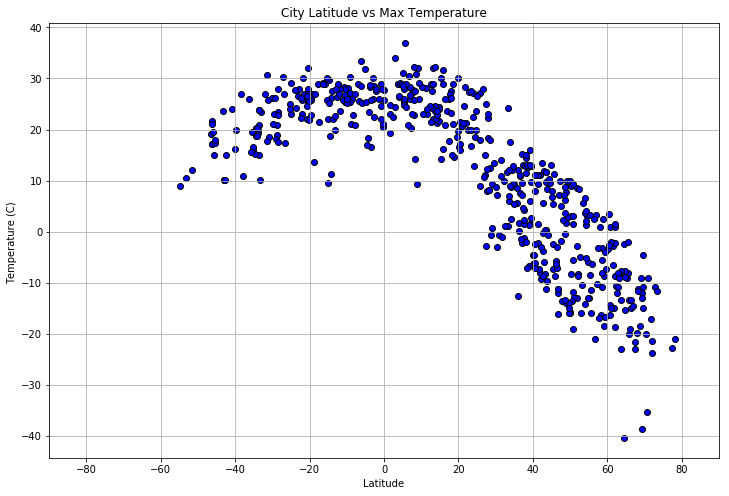

In [26]:
#Sets plot size
plt.figure(figsize = (12, 8))
# Latitude vs Max Temp
plt.scatter(weather_data["lat"], weather_data["temp"], marker="o", color="blue", edgecolor="black")

# Add chart labels
plt.title("City Latitude vs Max Temperature")
plt.ylabel("Temperature (C) ")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)


# Save the figure
plt.savefig("Lat_vs_MaxTemp.png")
# Show plot
plt.show()

#### Latitude vs. Humidity Plot

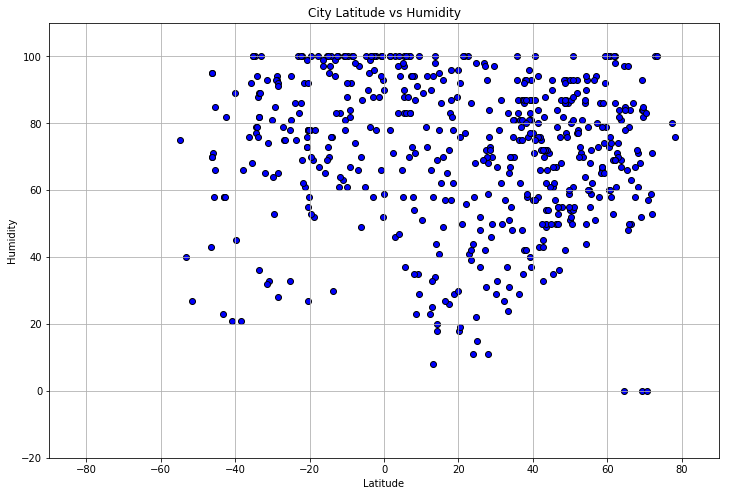

In [27]:
#Sets plot size
plt.figure(figsize = (12, 8))

# Latitude vs Max Temp
plt.scatter(weather_data["lat"], weather_data["humidity"], marker="o", color='blue', edgecolor='black')

# Add chart labels
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)
plt.ylim(-20, 110)

# Save the figure
plt.savefig("Lat_vs_Humidity.png")
# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

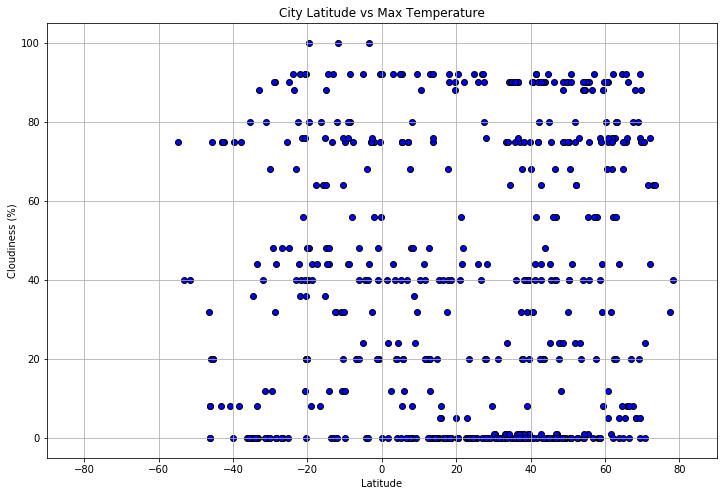

In [28]:
#Sets plot size
plt.figure(figsize = (12, 8))

# Latitude vs Max Temp
plt.scatter(weather_data["lat"], weather_data["cloudiness"], marker="o", color='blue', edgecolor='black')

# Add chart labels
plt.title("City Latitude vs Max Temperature")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)

# Save the figure
plt.savefig("Lat_vs_Cloudiness.png")
# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

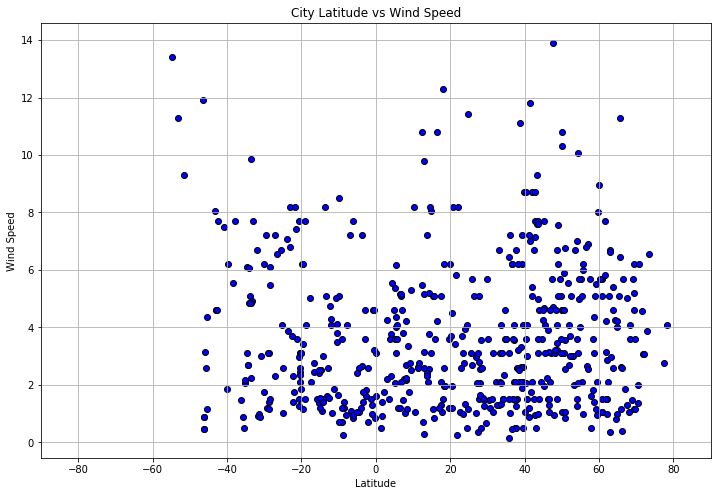

In [29]:
#Sets plot size
plt.figure(figsize = (12, 8))

# Latitude vs Max Temp
plt.scatter(weather_data["lat"], weather_data["winds"], marker="o", color='blue', edgecolor='black')

# Add chart labels
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)

# Save the figure
plt.savefig("Lat_vs_Wind Speed.png")
# Show plot
plt.show()

In [39]:
weather_data['temp_v'] = "xkcd:dark purple"  
# adds column to df, sets <= 0 colors
weather_data.loc[weather_data['temp'] > -17.78, 'temp_v'] = "xkcd:violet"       
# assigns colors to temps by range
weather_data.loc[weather_data['temp'] > -12.22, 'temp_v'] = "xkcd:indigo blue"
weather_data.loc[weather_data['temp'] > -6.66, 'temp_v'] = "xkcd:blue"
weather_data.loc[weather_data['temp'] > -1.11, 'temp_v'] = "xkcd:green"
weather_data.loc[weather_data['temp'] > 4.44, 'temp_v'] = "xkcd:sea green"
weather_data.loc[weather_data['temp'] > 10, 'temp_v'] = "xkcd:yellow green"
weather_data.loc[weather_data['temp'] > 15.55, 'temp_v'] = "xkcd:yellow"
weather_data.loc[weather_data['temp'] > 21.11, 'temp_v'] = "xkcd:orange"
weather_data.loc[weather_data['temp'] > 26.66, 'temp_v'] = "xkcd:reddish orange"
weather_data.loc[weather_data['temp'] > 32, 'temp_v'] = "xkcd:red"

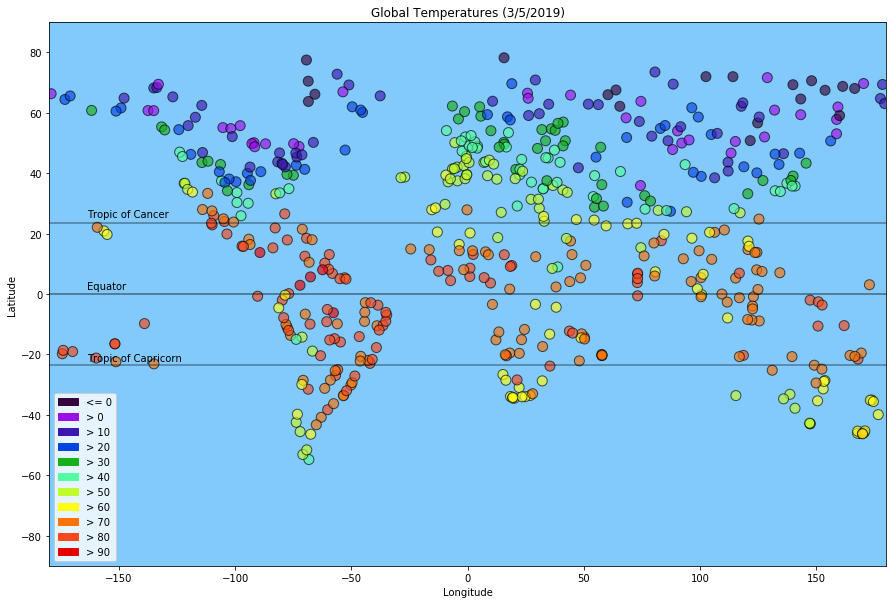

In [65]:
cur_date = datetime.now()
fig = plt.figure(figsize=(15,10))                                            # sets plot parameters
ax = fig.add_subplot(1,1,1)
plt.gca().set_facecolor('xkcd:sky')
ax.scatter(weather_data['lng'], weather_data['lat'], color=weather_data["temp_v"], s=100,  alpha=.65, edgecolors="k")
handles, labels = ax.get_legend_handles_labels()
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.axhline(0, c='k', alpha = .5)
plt.axhline(23.5, c='k', alpha = .4)
plt.axhline(-23.5, c='k', alpha = .4)
plt.title('Global Temperatures (%s/%s/%s' % (cur_date.month, cur_date.day, cur_date.year) + ')')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.gcf().text(.16,.51,"Equator", fontsize=10)
plt.gcf().text(.16,.61,"Tropic of Cancer", fontsize=10)
plt.gcf().text(.16,.41,"Tropic of Capricorn", fontsize=10)

templt0 = mpatches.Patch(color='xkcd:dark purple', label='<= 0')
tempgt0 = mpatches.Patch(color='xkcd:violet', label='> 0')
tempgt10 = mpatches.Patch(color='xkcd:indigo blue', label='> 10')
tempgt20 = mpatches.Patch(color='xkcd:blue', label='> 20')
tempgt30 = mpatches.Patch(color='xkcd:green', label='> 30')
tempgt40 = mpatches.Patch(color='xkcd:sea green', label='> 40')
tempgt50 = mpatches.Patch(color='xkcd:yellow green', label='> 50')
tempgt60 = mpatches.Patch(color='xkcd:yellow', label='> 60')
tempgt70 = mpatches.Patch(color='xkcd:orange', label='> 70')
tempgt80 = mpatches.Patch(color='xkcd:reddish orange', label='> 80')
tempgt90 = mpatches.Patch(color='xkcd:red', label='> 90')

plt.legend(handles=[templt0,
                    tempgt0,
                    tempgt10,
                    tempgt20,
                    tempgt30,
                    tempgt40,
                    tempgt50,
                    tempgt60,
                    tempgt70,
                    tempgt80,
                    tempgt90], frameon=True, loc="lower left")

# Save the figure
plt.savefig(f"Global Temperatures.png")
# Show plot
plt.show()

In [52]:
weather_data['humdy_v'] = ""                                                    # adds column to dataframe
weather_data.loc[weather_data['humidity'] >=0, 'humdy_v'] = "#FFFFFF"              # assigns colors to humidity by range
weather_data.loc[weather_data['humidity'] > 10, 'humdy_v'] = "#E5E5FF"
weather_data.loc[weather_data['humidity'] > 20, 'humdy_v'] = "#CCCCFF"
weather_data.loc[weather_data['humidity'] > 30, 'humdy_v'] = "#B2B2FF"
weather_data.loc[weather_data['humidity'] > 40, 'humdy_v'] = "#9999FF"
weather_data.loc[weather_data['humidity'] > 50, 'humdy_v'] = "#7F7FFF"
weather_data.loc[weather_data['humidity'] > 60, 'humdy_v'] = "#6666FF"
weather_data.loc[weather_data['humidity'] > 70, 'humdy_v'] = "#4C4CFF"
weather_data.loc[weather_data['humidity'] > 80, 'humdy_v'] = "#3333FF"
weather_data.loc[weather_data['humidity'] > 90, 'humdy_v'] = "#1919FF"
weather_data.loc[weather_data['humidity'] >= 100, 'humdy_v'] = "#0000FF"

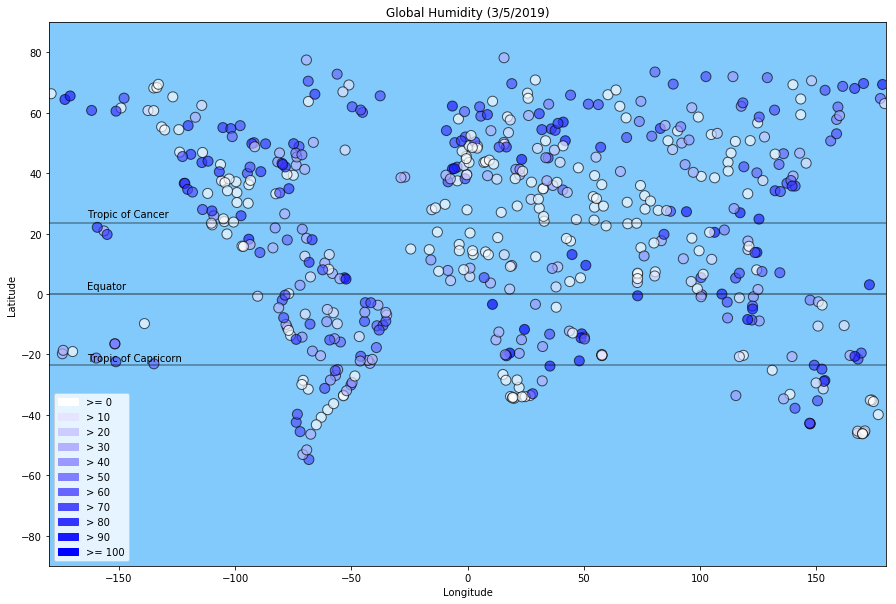

In [72]:
fig = plt.figure(figsize=(15,10))                                            # sets plot parameters
ax = fig.add_subplot(1,1,1)
plt.gca().set_facecolor('xkcd:sky')
ax.scatter(weather_data["lng"], weather_data["lat"], color=weather_data["humdy_v"], s=100, alpha=.65, edgecolors="k")
handles, labels = ax.get_legend_handles_labels()
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.axhline(0, c='k', alpha = .5)
plt.axhline(23.5, c='k', alpha = .4)
plt.axhline(-23.5, c='k', alpha = .4)
plt.title('Global Humidity (%s/%s/%s' % (cur_date.month, cur_date.day, cur_date.year) + ')')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.gcf().text(.16,.51,"Equator", fontsize=10)
plt.gcf().text(.16,.61,"Tropic of Cancer", fontsize=10)
plt.gcf().text(.16,.41,"Tropic of Capricorn", fontsize=10)

humidityge0 = mpatches.Patch(color='#FFFFFF', label='>= 0')
humiditygt10 = mpatches.Patch(color='#E5E5FF', label='> 10')
humiditygt20 = mpatches.Patch(color='#CCCCFF', label='> 20')
humiditygt30 = mpatches.Patch(color='#B2B2FF', label='> 30')
humiditygt40 = mpatches.Patch(color='#9999FF', label='> 40')
humiditygt50 = mpatches.Patch(color='#7F7FFF', label='> 50')
humiditygt60 = mpatches.Patch(color='#6666FF', label='> 60')
humiditygt70 = mpatches.Patch(color='#4C4CFF', label='> 70')
humiditygt80 = mpatches.Patch(color='#3333FF', label='> 80')
humiditygt90 = mpatches.Patch(color='#1919FF', label='> 90')
humidityge100 = mpatches.Patch(color='#0000FF', label='>= 100')

plt.legend(handles=[humidityge0,
                    humiditygt10,
                    humiditygt20,
                    humiditygt30,
                    humiditygt40,
                    humiditygt50,
                    humiditygt60,
                    humiditygt70,
                    humiditygt80,
                    humiditygt90,
                    humidityge100], frameon=True, loc="lower left")


# Save the figure
plt.savefig("Global Humidity.png")
# Show plot
plt.show()           

In [73]:
weather_data['cloud_v'] = ""                                                    # adds column to dataframe
weather_data.loc[weather_data['cloudiness'] >=0, 'cloud_v'] = "#FFFFFF"              # assigns colors to cloudiness by range
weather_data.loc[weather_data['cloudiness'] > 10, 'cloud_v'] = "#E5E5FF"
weather_data.loc[weather_data['cloudiness'] > 20, 'cloud_v'] = "#CCCCFF"
weather_data.loc[weather_data['cloudiness'] > 30, 'cloud_v'] = "#B2B2FF"
weather_data.loc[weather_data['cloudiness'] > 40, 'cloud_v'] = "#9999FF"
weather_data.loc[weather_data['cloudiness'] > 50, 'cloud_v'] = "#7F7FFF"
weather_data.loc[weather_data['cloudiness'] > 60, 'cloud_v'] = "#6666FF"
weather_data.loc[weather_data['cloudiness'] > 70, 'cloud_v'] = "#4C4CFF"
weather_data.loc[weather_data['cloudiness'] > 80, 'cloud_v'] = "#3333FF"
weather_data.loc[weather_data['cloudiness'] > 90, 'cloud_v'] = "#1919FF"
weather_data.loc[weather_data['cloudiness'] >= 100, 'cloud_v'] = "#0000FF"

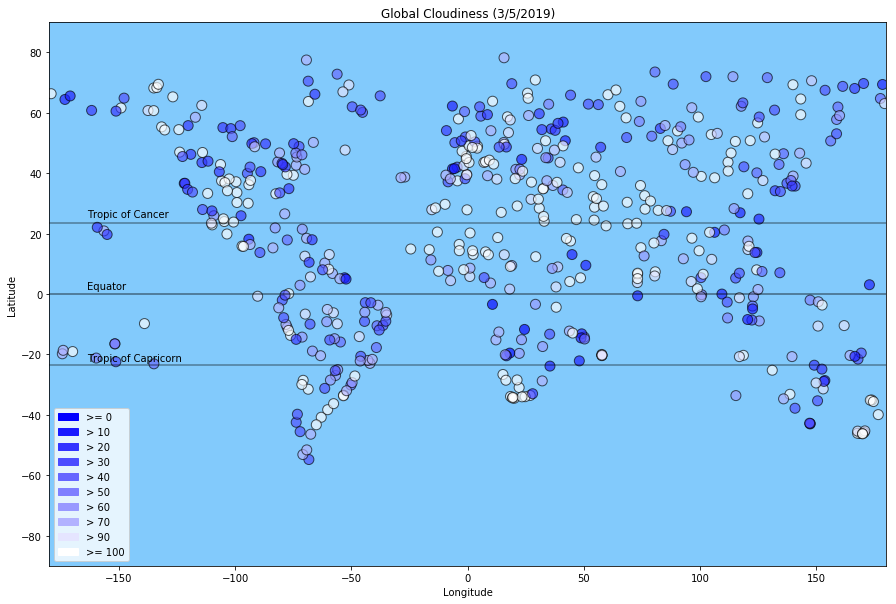

In [74]:
fig = plt.figure(figsize=(15,10))                                            # sets plot parameters
ax = fig.add_subplot(1,1,1)
plt.gca().set_facecolor('xkcd:sky')
ax.scatter(weather_data["lng"], weather_data["lat"], color=weather_data["cloud_v"], s=100, alpha=.65, edgecolors="k")
handles, labels = ax.get_legend_handles_labels()
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.axhline(0, c='k', alpha = .5)
plt.axhline(23.5, c='k', alpha = .4)
plt.axhline(-23.5, c='k', alpha = .4)
plt.title('Global Cloudiness (%s/%s/%s' % (cur_date.month, cur_date.day, cur_date.year) + ')')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.gcf().text(.16,.51,"Equator", fontsize=10)
plt.gcf().text(.16,.61,"Tropic of Cancer", fontsize=10)
plt.gcf().text(.16,.41,"Tropic of Capricorn", fontsize=10)

cloudsge0 = mpatches.Patch(color='#0000FF', label='>= 0')
cloudsgt10 = mpatches.Patch(color='#1919FF', label='> 10')
cloudsgt20 = mpatches.Patch(color='#3333FF', label='> 20')
cloudsgt30 = mpatches.Patch(color='#4C4CFF', label='> 30')
cloudsgt40 = mpatches.Patch(color='#6666FF', label='> 40')
cloudsgt50 = mpatches.Patch(color='#7F7FFF', label='> 50')
cloudsgt60 = mpatches.Patch(color='#9999FF', label='> 60')
cloudsgt70 = mpatches.Patch(color='#B2B2FF', label='> 70')
cloudsgt80 = mpatches.Patch(color='#CCCCFF', label='> 80')
cloudsgt90 = mpatches.Patch(color='#E5E5FF', label='> 90')
cloudsge100 = mpatches.Patch(color='#FFFFFF', label='>= 100')

plt.legend(handles=[cloudsge0,
                    cloudsgt10,
                    cloudsgt20,
                    cloudsgt30,
                    cloudsgt40,
                    cloudsgt50,
                    cloudsgt60,
                    cloudsgt70,
                    cloudsgt90,
                    cloudsge100], frameon=True, loc="lower left")

# Save the figure
plt.savefig("Global Cloudiness.png")
# Show plot
plt.show()  

In [75]:
weather_data['wind_v'] = ""                                                     
weather_data.loc[weather_data['winds'] >= 0, 'wind_v'] = "xkcd:violet"   
weather_data.loc[weather_data['winds'] > 5, 'wind_v'] = "xkcd:indigo blue"
weather_data.loc[weather_data['winds'] > 10, 'wind_v'] = "xkcd:blue"
weather_data.loc[weather_data['winds'] > 15, 'wind_v'] = "xkcd:green"
weather_data.loc[weather_data['winds'] > 20, 'wind_v'] = "xkcd:sea green"
weather_data.loc[weather_data['winds'] > 35, 'wind_v'] = "xkcd:yellow"
weather_data.loc[weather_data['winds'] > 30, 'wind_v'] = "xkcd:orange"
weather_data.loc[weather_data['winds'] > 35, 'wind_v'] = "xkcd:reddish orange"
weather_data.loc[weather_data['winds'] > 40, 'wind_v'] = "xkcd:red"

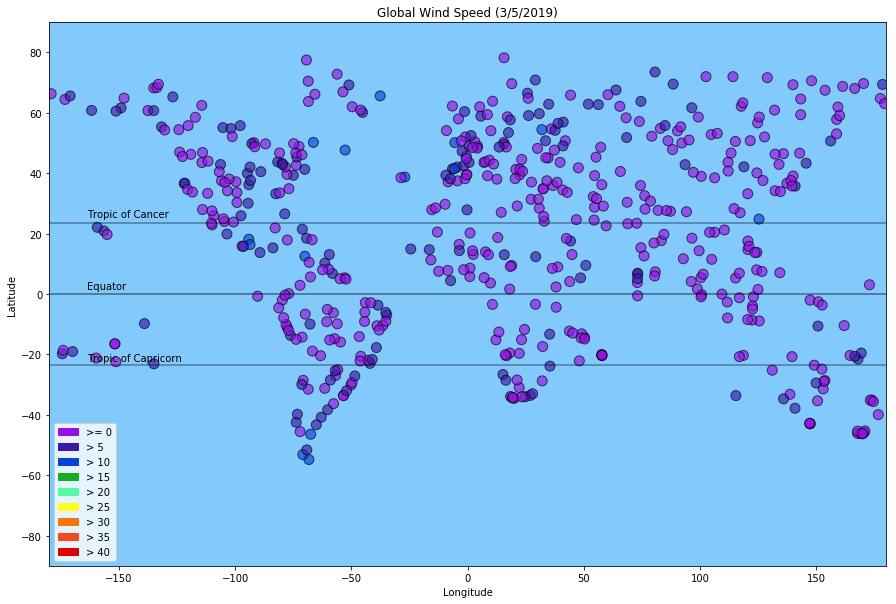

In [76]:
fig = plt.figure(figsize=(15,10))                                            # sets plot parameters
ax = fig.add_subplot(1,1,1)
ax.scatter(weather_data["lng"], weather_data["lat"], color=weather_data["wind_v"], s=100, alpha=.65, edgecolors="k")
handles, labels = ax.get_legend_handles_labels()
plt.gca().set_facecolor('xkcd:sky')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.axhline(0, c='k', alpha = .5)
plt.axhline(23.5, c='k', alpha = .4)
plt.axhline(-23.5, c='k', alpha = .4)
plt.title('Global Wind Speed (%s/%s/%s' % (cur_date.month, cur_date.day, cur_date.year) + ')')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.gcf().text(.16,.51,"Equator", fontsize=10)
plt.gcf().text(.16,.61,"Tropic of Cancer", fontsize=10)
plt.gcf().text(.16,.41,"Tropic of Capricorn", fontsize=10)

windge0 = mpatches.Patch(color='xkcd:violet', label='>= 0')
windgt5 = mpatches.Patch(color='xkcd:indigo blue', label='> 5')
windgt10 = mpatches.Patch(color='xkcd:blue', label='> 10')
windgt15 = mpatches.Patch(color='xkcd:green', label='> 15')
windgt20 = mpatches.Patch(color='xkcd:sea green', label='> 20')
windgt25 = mpatches.Patch(color='xkcd:yellow', label='> 25')
windgt30 = mpatches.Patch(color='xkcd:orange', label='> 30')
windgt35 = mpatches.Patch(color='xkcd:reddish orange', label='> 35')
windgt40 = mpatches.Patch(color='xkcd:red', label='> 40')

plt.legend(handles=[windge0, windgt5, 
                    windgt10, 
                    windgt15, 
                    windgt20, 
                    windgt25, 
                    windgt30, 
                    windgt35, 
                    windgt40], frameon=True, loc="lower left")

# Save the figure
plt.savefig("Global Wind Speed.png")
# Show plot
plt.show()        